<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_13_%EC%86%90_%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 0~9까지 손글씨 이미지 데이터를 분류하는 모델을 만들어보자

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 케라스에서 지원하는 딥러닝 학습용 손글씨 데이터를 임포트
from tensorflow.keras.datasets import mnist

In [3]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
# 데이터가 3차원 배열로 크게는 train, test로 나뉘어져 있고
# 각 train, test 안에 문제와 정답 데이터로 한 번 나눠져 있음
len(data)

2

In [6]:
print(len(data[0]))      # X
print(len(data[1]))     # y
print(len(data[0][0]))  # X_train
print(len(data[0][1]))  # X_train
print(len(data[1][0]))  # X_train
print(len(data[1][1]))  # X_train

2
2
60000
60000
10000
10000


In [7]:
X_train = data[0][0]  # X_train
y_train = data[0][1]  # y_train
X_test = data[1][0]  # X_test
y_test = data[1][1]  # y_test

In [8]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

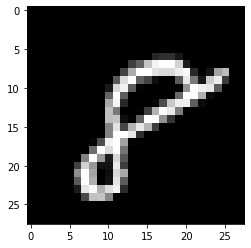

In [11]:
plt.imshow(X_train[59999], cmap ='gray')
# imshow: 이미지 데이터를 그림으로 출력해주는 명령
plt.show()

In [12]:
print(X_train[59999])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [13]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [31]:
y_train_one_hot.shape

(60000, 10)

In [15]:
y_test_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,1,0,0,0,0


- 딥러닝 신경망에서는 2차원 이미지 데이터를 한 번에 넣을 수가 없기 때문에 데이터의 차원을 1차원으로 변경시켜서 넣어줘야 함!

In [16]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 일렬로 퍼줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [17]:
# 이미지는 픽셀 하나하나가 하나의 특성으로 인식됨
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### 신경망 구조를 직접 설계해보자!

- 입력 특성 수 
- 출력층 활성화 함수
- 손실함수 (loss)
- 최적화함수 (optimizer)



In [18]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import InputLayer,Dense

In [34]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(1000,input_dim=784,activation="sigmoid"))

# 중간층
model.add(Dense(500,activation="sigmoid"))   # 하나의 층
model.add(Dense(100, activation="sigmoid"))   # 하나의 층

# 출력층
model.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 1,336,610
Trainable params: 1,336,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [36]:
h = model.fit(X_train, y_train_one_hot, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4151 - acc: 0.8763
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - acc: 0.9132
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2416 - acc: 0.9252
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2157 - acc: 0.9327
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2071 - acc: 0.9349
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1860 - acc: 0.9413
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1721 - acc: 0.9464
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1680 - acc: 0.9474
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1588 - acc: 0.9496
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1557 - acc: 0.9509
Epoch 11/50
1875/1875 [======

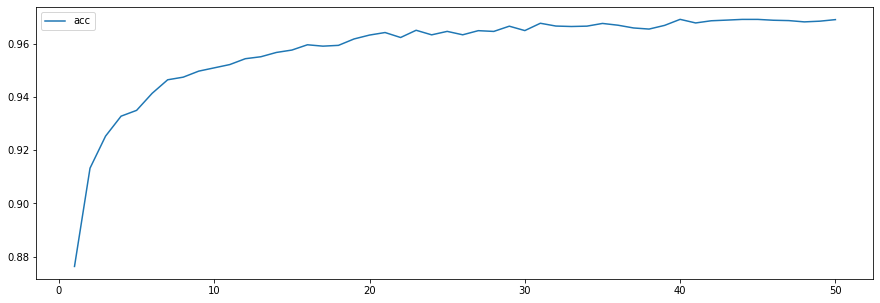

In [37]:
# 시각화
# 시각화
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
         h.history['acc'],
         label ='acc'
         )

plt.legend()
plt.show()

In [38]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.1206 - acc: 0.9631


[0.12056143581867218, 0.963100016117096]